# The School of AI: Assignment 5

## Import necessary packages

In [1]:
import torch
import torch.nn as nn

from utils import *
from model import Net

## Check CUDA availability

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

CUDA Available? True


## Get transforms 

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
   
    ])

## Get Train/Test Datasets

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

## Generate Train/Test dataloaders

In [5]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

### show some sample images from dataloader

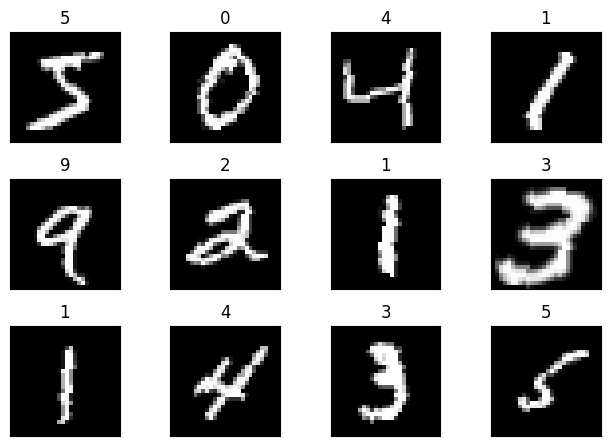

In [6]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

## Test the model with some random data

In [7]:
xx = torch.randn(1,1,28,28).to(device)
model = Net().to(device)
pred = model(xx)

## Train the model
- Instantiate the model
- get the optimizer instance
- get the scheduler instance
- get the criterion
- run the training loop for desired number of epochs

In [8]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [10]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=4e-3, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss(reduction='mean')

num_epochs = 20

for epoch in range(0, num_epochs):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train_step(model, device, train_loader, optimizer, criterion, train_acc, train_losses)
  test_acc, test_losses = test_step(model, device, test_loader, criterion, test_acc, test_losses)
  scheduler.step()

  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 0


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0038, Accuracy: 5294/10000 (52.94%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 1


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0005, Accuracy: 9250/10000 (92.50%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 2


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0003, Accuracy: 9605/10000 (96.05%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 3


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0002, Accuracy: 9719/10000 (97.19%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 4


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0002, Accuracy: 9723/10000 (97.23%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 5


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9770/10000 (97.70%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 6


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9813/10000 (98.13%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 7


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9805/10000 (98.05%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 8


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9828/10000 (98.28%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 9


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9847/10000 (98.47%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 10


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9834/10000 (98.34%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 11


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9850/10000 (98.50%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 12


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9867/10000 (98.67%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 13


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9863/10000 (98.63%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 14


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9868/10000 (98.68%)

Adjusting learning rate of group 0 to 4.0000e-04.
Epoch 15


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9898/10000 (98.98%)

Adjusting learning rate of group 0 to 4.0000e-04.
Epoch 16


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9899/10000 (98.99%)

Adjusting learning rate of group 0 to 4.0000e-04.
Epoch 17


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9897/10000 (98.97%)

Adjusting learning rate of group 0 to 4.0000e-04.
Epoch 18


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0001, Accuracy: 9901/10000 (99.01%)

Adjusting learning rate of group 0 to 4.0000e-04.
Epoch 19


Train: Loss=0.1249 Batch_id=117 Accuracy=98.63: 100%|████████████████████████████████| 118/118 [00:06<00:00, 18.87it/s]


Test set: Average loss: 0.0001, Accuracy: 9896/10000 (98.96%)

Adjusting learning rate of group 0 to 4.0000e-04.


## Plot the accuracies / Losses

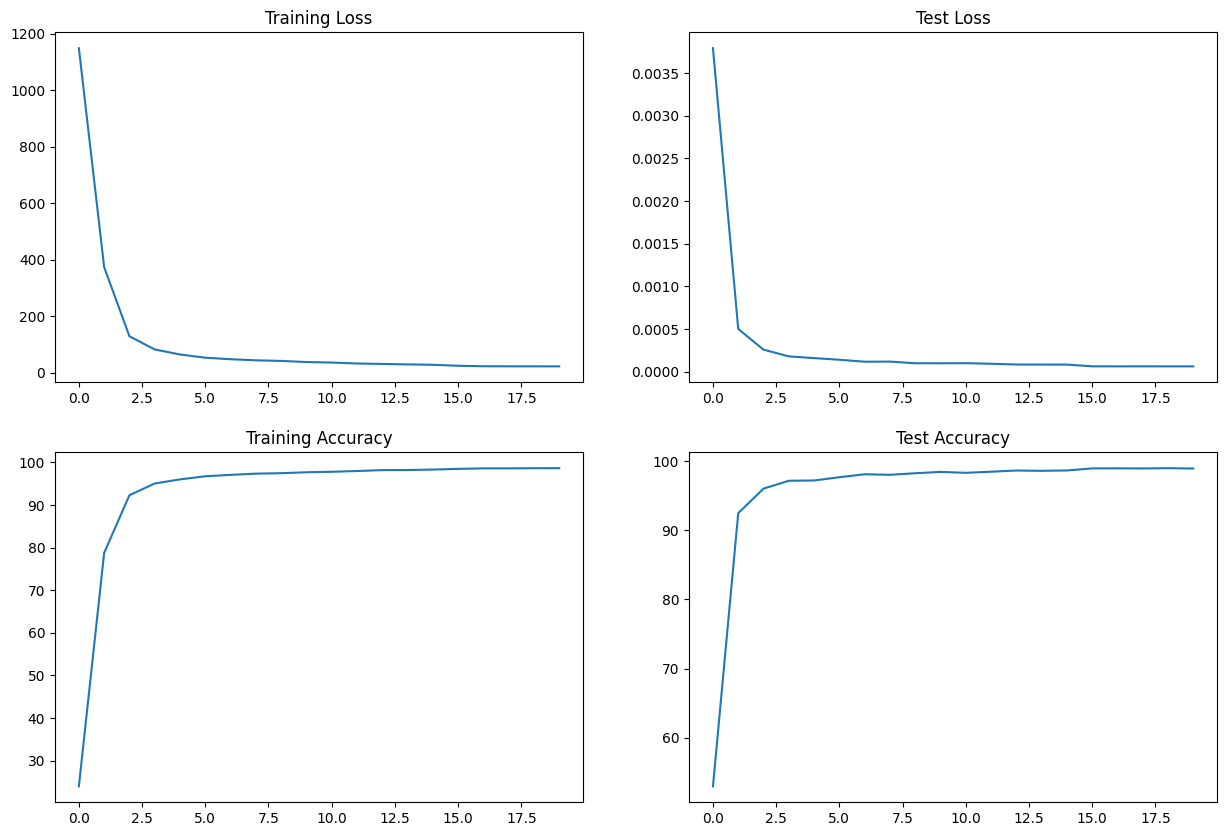

In [11]:
plot_acc_loss(train_losses, train_acc, test_losses, test_acc)

## Model Summary

In [12]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
